In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

### 1. Coleta e preparação de dados

In [2]:
data = fetch_ucirepo(id=17)
X = data.data.features 
y = data.data.targets 

print("Primeiras linhas das features:")
print(X.head())
print("\nPrimeiras linhas dos targets:")
print(y.head())

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Primeiras linhas das features:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavi

### 2. Determinação do número ideal de clusters


Melhor valor de K (baseado no Silhouette Score): 2


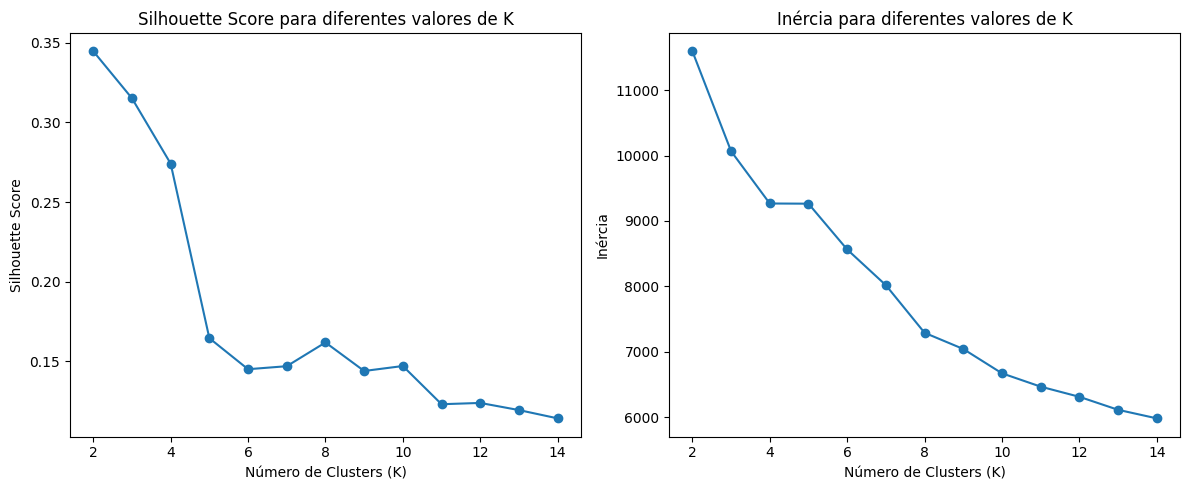

C:\Users\Laura\AppData\Local\Temp\ipykernel_24012\3852933469.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = clusters


In [3]:
scores = []
inertias = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, clusters))
    inertias.append(kmeans.inertia_)
    
best_k = k_values[np.argmax(scores)]
print(f"\nMelhor valor de K (baseado no Silhouette Score): {best_k}")

# Plotando o Silhouette Score e a Inércia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, marker='o')
plt.title("Inércia para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")

plt.tight_layout()
plt.show()

# Aplicando K-Means com o melhor K
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X['cluster'] = clusters

### 3. Análise dos clusters

In [4]:
# Médias por cluster
cluster_summary = X.groupby('cluster').mean()
print("\nMédias por cluster:")
print(cluster_summary)

# Relação entre clusters e benignidade/malignidade
target_relation = pd.crosstab(X['cluster'], y['Diagnosis'], normalize='index')
print("\nRelação entre clusters e diagnóstico (benigno/maligno):")
print(target_relation)


Médias por cluster:
           radius1   texture1  perimeter1       area1  smoothness1  \
cluster                                                              
0        17.600702  21.403989  116.699840  997.632447     0.104610   
1        12.413378  18.246352   79.765906  485.766404     0.092289   

         compactness1  concavity1  concave_points1  symmetry1  \
cluster                                                         
0            0.157850    0.179992         0.094290   0.197689   
1            0.077938    0.043801         0.026532   0.173007   

         fractal_dimension1  ...    radius3   texture3  perimeter3  \
cluster                      ...                                     
0                  0.064415  ...  21.350319  28.852394   143.44266   
1                  0.062000  ...  13.761966  24.110472    89.40790   

               area3  smoothness3  compactness3  concavity3  concave_points3  \
cluster                                                                     

### 4. Visualização dos resultados

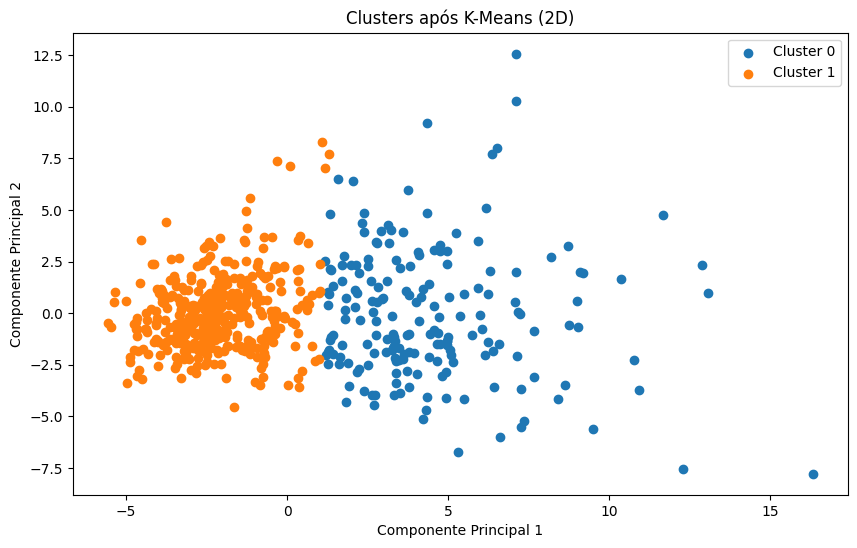

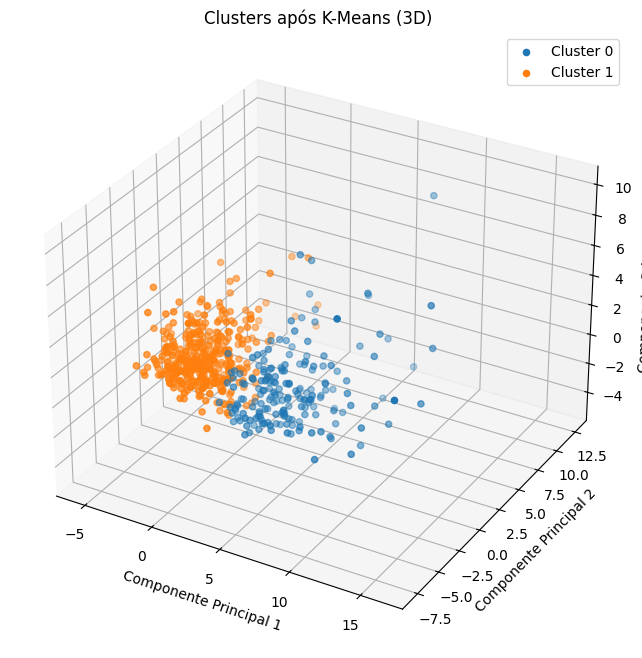

In [5]:
# Redução de dimensionalidade com PCA
pca = PCA(n_components=3)  # Usando 3 componentes para visualização 3D
X_pca = pca.fit_transform(X_scaled)

# Visualização 2D
plt.figure(figsize=(10, 6))
for cluster in range(best_k):
    plt.scatter(
        X_pca[X['cluster'] == cluster, 0], 
        X_pca[X['cluster'] == cluster, 1], 
        label=f"Cluster {cluster}"
    )
plt.title("Clusters após K-Means (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Visualização 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(best_k):
    ax.scatter(
        X_pca[X['cluster'] == cluster, 0], 
        X_pca[X['cluster'] == cluster, 1], 
        X_pca[X['cluster'] == cluster, 2], 
        label=f"Cluster {cluster}"
    )
ax.set_title("Clusters após K-Means (3D)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
plt.legend()
plt.show()

### 5. Interpretação dos resultados

In [6]:
print(f"O melhor número de clusters encontrado foi K = {best_k}, com base no Silhouette Score.")
print("A análise das médias por cluster e a relação com o diagnóstico (benigno/maligno) pode fornecer insights sobre como os clusters se relacionam com as características do câncer de mama.")

O melhor número de clusters encontrado foi K = 2, com base no Silhouette Score.
A análise das médias por cluster e a relação com o diagnóstico (benigno/maligno) pode fornecer insights sobre como os clusters se relacionam com as características do câncer de mama.
